## 범례의 표시

In [1]:
# 색상의 조정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

빨간색 점으로 데이터를 표시합니다. 
- maker:
- color:

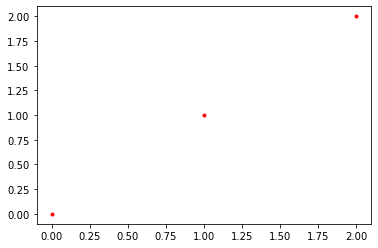

In [2]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker = '.', color='red')

색상을 변경해봅니다. 
- color에 값으로 RGB값을 넣을 수 있습니다. 
    - 각 RGB값은 16진수 값을 0~FF 범위에서 사용합니다.
    - RGB값의 시작을 '#'으로 시작하며 '#000000'은 검은색을 나타냅니다.

아래 예제에서 RGB값과 실제 표시된 색상을 확인해보세요.  

Text(0.5, 1.0, 'red points (RGB)')

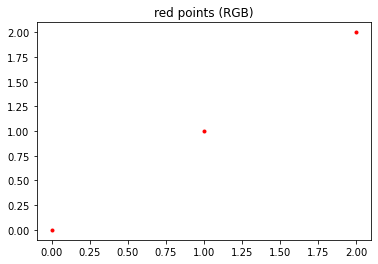

In [6]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker = '.', color='#FF0000')
ax.set_title('red points (RGB)')

Text(0.5, 1.0, 'green points (RGB)')

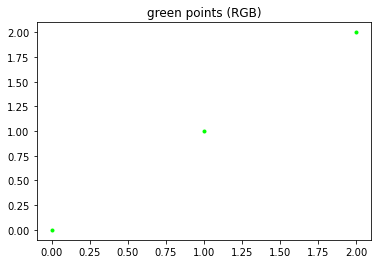

In [7]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker = '.', color='#00FF00')
ax.set_title('green points (RGB)')

Text(0.5, 1.0, 'blue points (RGB)')

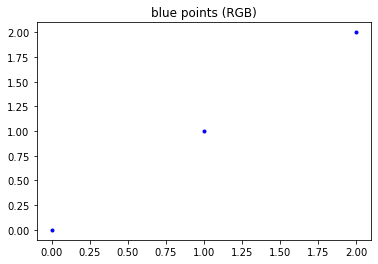

In [8]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker = '.', color='#0000FF')
ax.set_title('blue points (RGB)')

문자로 표시한 색상을 RGB로 나타내는 방법이 있을까요? ***matplotlib.colors*** 에 있는 to_rgba 함수를 이용하면 됩니다. 

In [14]:
mcolors.to_rgba('red')

(1.0, 0.0, 0.0, 1.0)

실수값으로 color를 입력할 수도 있습니다.

Text(0.5, 1.0, 'red points (RGB)')

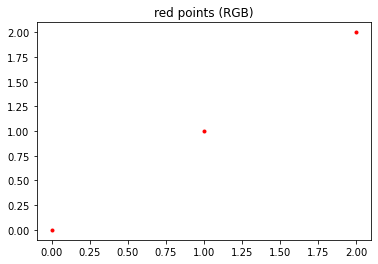

In [15]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), marker = '.', color=mcolors.to_rgb('red'))
ax.set_title('red points (RGB)')

color에 scatter에서 위치를 지정한 입력값과 길이가 같은 색상 문자열 벡터가 오는 경우 순서대로 색상을 시각화 객체에 할당합니다.  아래 예를 살펴봅시다.

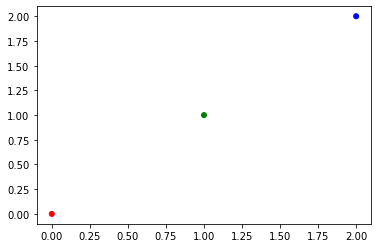

In [22]:
fig, ax = plt.subplots()
ax.scatter(range(3), range(3), s = 100, 
           marker = '.', color=['red','green','blue'])

이러한 방식으로 색상을 조절 할 수 있으므로 점의 색상을 다른 정보를 변환하여 표시할 수 있습니다. 여기서는 *col_vec*에 빨간색 값이 증가하는 벡터(튜플)을 만들었습니다.

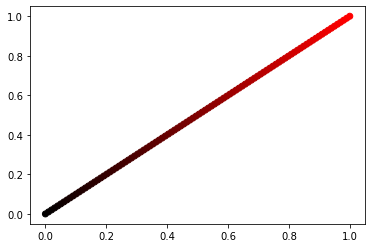

In [23]:
fig, ax = plt.subplots()
n = 100
col_vec = tuple(zip(np.linspace(0,1,n),np.zeros(n), np.zeros(n) ))
ax.scatter( np.linspace(0,1,n), np.linspace(0,1,n), color = col_vec)

RGB 색상 체계는 다양한 색깔의 스펙트럼을 만들어 내기가 어렵습니다. 왜냐하면 색상의 순서를 조합하여 직관적인 색의 변화를 예상하기가 어렵기 때문입니다. 여기는 우리가 좀더 쉽고 직관적으로 이해할 수 있는 HSV색상 체계를 소개합니다. 
- hue: 0~1 사이 값으로 빨간색부터 보라색까지 스펙트럼이 짦아지는 방향으로 배열되어 있음. 
- saturate: 채로로 0~1사이의 값을 가지고 1이 채도가 높은 값임. 
- value: 밝기로 0~1사이 값을 가지고 1이 밝은 값임. 

In [36]:
# 색상의 변경
fig, ax = plt.subplots()
n = 100
col_vec = tuple(zip(np.linspace(0,1,n), np.repeat(0.9,n), np.repeat(0.9,n)))
col_vec = mcolors.hsv_to_rgb(col_vec)
ax.scatter( np.linspace(0,1,n), np.linspace(0,1,n), color = col_vec)ㅠ
ax.set_title('hue map')

SyntaxError: invalid syntax (2759695131.py, line 6)

Text(0.5, 1.0, 'saturate map')

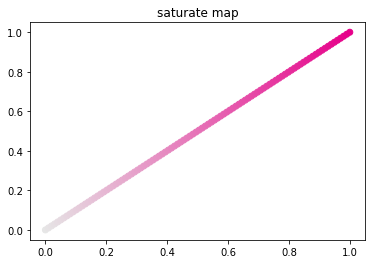

In [37]:
fig, ax = plt.subplots()
n = 100
col_vec = tuple(zip(np.repeat(0.9,n), np.linspace(0,1,n), np.repeat(0.9,n)))
col_vec = mcolors.hsv_to_rgb(col_vec)
ax.scatter( np.linspace(0,1,n), np.linspace(0,1,n), color = col_vec)
ax.set_title('saturate map')

Text(0.5, 1.0, 'value map')

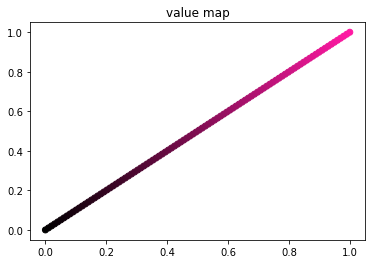

In [38]:
fig, ax = plt.subplots()
n = 100
col_vec = tuple(zip(np.repeat(0.9,n), np.repeat(0.9,n), np.linspace(0,1,n)))
col_vec = mcolors.hsv_to_rgb(col_vec)
ax.scatter( np.linspace(0,1,n), np.linspace(0,1,n), color = col_vec)
ax.set_title('value map')

잘 정리된 순서에 맞게 색상을 배열한 것을 색상 팔레트(palette)라고 부릅니다. 잘 만들어진 팔레트들이 많이 있으며 matplotlib에서는 cmap 옵션을 통해서 색상팔레트를 정할 수 있습니다. 아래 예는 'hot'의 이름을 가진 팔레트입니다. 이 팔레트는 검은색-붉은색-노란색-흰색으로 배열되어 있습니다. 

기본적으로 팔레트에는 색상이 순서대로 배열되어 있고 대부분의 시각화 도구는 'c'옵션의 값의 크기순으로 색상을 배열합니다. 

아래 예는 c 옵션의 값으로 $x$ 값을 그대로 이용했으며 x가 작은값일 때 'hot'팔레트의 검은색 계열로 표시, x가 큰 값을때는 노란색-흰색 계열로 표시하게 됩니다. 

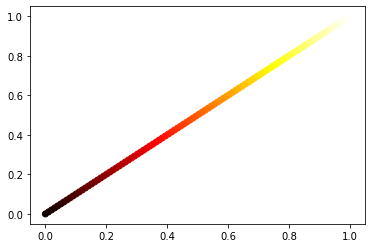

In [32]:
x = np.linspace(0,1,n)
fig, ax = plt.subplots()
ax.scatter(x,x, c = x, cmap ='hot') 

In [34]:
# color text의 확인
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

filled contour (contourf) 함수에서 cmap을 적용해봅시다. 

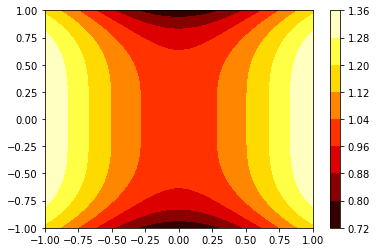

In [35]:
# 3-1-3
# meshgrid 사용방법을 익히자. 결과물이 tuple로 저장되어 있어 함수에 넣으면
# 2D처럼 작동함.
x = np.linspace(-1,1, 100)
y = np.linspace(-1,1, 100)
xs, ys = np.meshgrid(x,y)
zs = np.sqrt(np.sin(xs**2) + np.cos(ys**2))
plt.contourf(x,y, zs, cmap = 'hot')
plt.colorbar()


